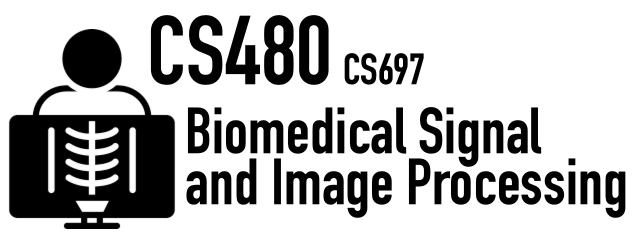
#Assignment 4

In [23]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [56]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'reshape', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [25]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [26]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [27]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [28]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

##############################################################
##### I was having runtime issues trying to do this in Colab, 
##### so I downloaded the .ipynb and completed the assignment 
##### locally.
##############################################################

In [29]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [30]:
# TODO: Please display this image and print the dimensions!

Dimensions are: (1858, 2090)


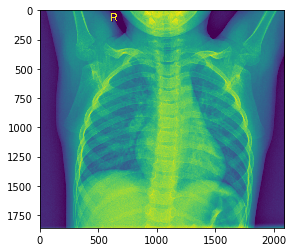

In [89]:
# TODO: YOUR CODE
imshow(img)
print("Dimensions are:",img.shape)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [32]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [33]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [34]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) Reshape the images to 300x300 pixels
# TODO: Operation 2) Puts each image into a numpy array, either normal_images or pneumonia_images, creating 
#                    3 dimensional arrays, a stack of 2d images.

In [35]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

<Figure size 432x288 with 0 Axes>

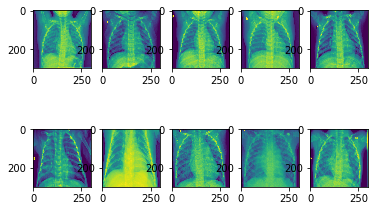

In [71]:
# TODO: YOUR CODE
plt.figure()

f, axarr = plt.subplots(2,5) 

for i in range(5):
    axarr[0,i].imshow(normal_images[i])
    axarr[1,i].imshow(pneumonia_images[i])

**Task 3:** Setup training and testing data. [15 Points]

In [37]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [38]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [90]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = np.append(np.zeros(TRAINING_COUNT),np.ones(TRAINING_COUNT))

In [40]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [91]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = np.append(np.zeros(TESTING_COUNT),np.ones(TESTING_COUNT))

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [57]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [58]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [59]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [60]:
# A random forest classifier uses several tree classifiers in conjunction to classify a given datapoint.
# Each tree classifies the the data individually and ideally differently from each other tree, and the final
# classification is the one most of the trees predict. This allows for a more robust system, where one tree's errors
# can be made up for by the other trees, so long as most of the trees do not make the same error.

In [61]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.925

In [62]:
# TODO: Is the classification accuracy good? And, are you surprised?

In [63]:
# TODO: For a prediction on non-standardized data, the prediction is pretty impressive, it is able to guess about
# 9 in 10 correct. However, This accuracy would not, and should not, be acceptable in most cases, especially medically.
# I am surprised by this result, in my experience classifiers are usually very good at tasks like this, identifying
# irregularities given a sizeable stack of "regular" and possible "irregular" data.

**Bonus:** Let's take a closer look! [33 Points]

In [64]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

<Figure size 432x288 with 0 Axes>

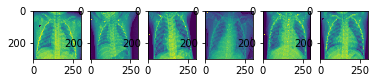

In [83]:
# TODO: YOUR CODE AND YOUR ANSWER
predictions = clf.predict(testing_data)
misclassified=testing_target-predictions

plt.figure()
f1, axarr1 = plt.subplots(1,int(sum(abs(misclassified))))

c = 0

for i in range(len(misclassified)):
    if misclassified[i]!=0:
        reshape=testing_data[i].reshape((300,300))
        axarr1[c].imshow(reshape)
        c=c+1
        
#print(misclassified) # Used to determine which misclassifications were false posititves, and which were false 
                     # negatives. False positives would be -1, false negative 1. 0's are correctly classified.
    
# plt.figure()
# imshow(testing_data[2].reshape((300,300))) # To get a bigger image of the misclassified cases

# Looking at the the images, the images may be problematic because of the mass in the center. Looking at
# the false negative cases, it seems like the center mass is not nearly as large as some of the other
# pneumonia cases, and the flange-like structures that reach into the lungs (I assume they are blood vessels
# and capillaries) are not as clouded compared to other cases in the pneumonia set. Looking at the false
# positives, we can see that similarly, the lung areas seem to be more clouded than some of their normal
# counterparts. Assuming that some of the trees in the random forrest are trained on detecting the clarity of
# the flange structures in the lungs, having variance in the clarity of the scan could cause some of these issues.

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER
# Assuming that our assumption in the previous section is correct, one way to clear up some of the ambiguity in the
# lung areas is to increase the contrast in the images, and normalize the values across the dataset. Normalizing
# the values across the dataset will theoreticall ensure that the densest parts(the bones) across all images will be
# much closer in value than they currenty are, same with the least dense parts (the areas around the patient, where
# there is no patient). Since the least dense part is where there is no human to scan, the darkest parts should be
# completely equivalent, and since pneumonia doesn't affect bone density (I think), normalizing the bone density
# should not affect any meaningful data for this classification. Increasing the contrast could also help this issue.
# Looking through the images, it seems that some of the images are a lot "brighter", and some a lot "dimmer" than
# the others. Looking around online, it seems like the ampereage and the exposure time can affect this. Scans done 
# with different machines, and different operators, could cause variance in both of these factors, neither of which
# are indicative of the health of the patient. Increasing the contrast should make the dimmer images more similar to
# the other images, showing a bigger contrast between the flange structures and the lung proper, and should make the
# cloudiness from the pneumonia clearer, and easier to detect.In short, a lot of errors can be avoided if there was
# some normalization done on the inputs to make sure the data is as similar in structure as possible.

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw